Linear Regression Model

In [2]:
import pandas as pd
import numpy as np


In [40]:
'''Select and preprocess stock data'''
data =  pd.read_csv('/Users/niweichong/Desktop/Git/Tools-Project-Data-Cleaning-master/Tools-Project-Data-Cleaning/Clean_Data_Out.csv')

#select values needed and particular stock, modify the date to trading days
def select_stock(stock_name:str):
    data_col_chosen = data[['Name','open','close','volume',]]
    data_stock_chosen = data_col_chosen.loc[data['Name']==stock_name]
    data_stock_chosen.insert(1, 'trading day', [i+1 for i in range(len(data_stock_chosen['Name']))])
    return data_stock_chosen

#eg. choose 'AAL'
data = select_stock('AAL')

'AAL'

In [54]:
#output to csv file
data.to_csv('%s_preprocessed.csv' %data.iat[0, 0],index= False)

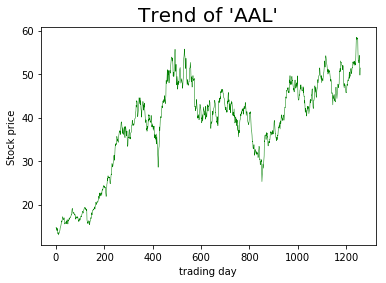

<Figure size 864x1152 with 0 Axes>

In [53]:
import matplotlib.pyplot as plt 

def plot(data):
    x=data["trading day"]
    y=data["close"]
    plt.plot(x, y, '-',linewidth = 0.5, color = 'green' )
    plt.xlabel('trading day')
    plt.ylabel('Stock price')
    plt.title("Trend of '%s'" %(data.iat[0, 0]), fontsize = 20)
    plt.savefig('stock_trend_fig_example.png', dpi = 600)
    plt.figure(figsize=(12,16))
    return plt.show()
plot(data)

In [65]:
import math
from IPython.display import display
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import TimeSeriesSplit

#import visualize as vs
# import stock_data as sd
# import LinearRegressionModel

"""
    This function rescales a numpy array from input to target range
    x: data to scale
    input_range: optional input range for data, default 0.0:1.0
    target_range: optional target range for data, default 0.0:1.0
    return: rescaled array, incoming range [min,max]
"""
def scale_range(x, input_range, target_range):

    range = [np.amin(x), np.amax(x)]
    x_std = (x - input_range[0]) / (1.0*(input_range[1] - input_range[0]))
    x_scaled = x_std * (1.0*(target_range[1] - target_range[0])) + target_range[0]
    return x_scaled, range

"""
    This function splits the data set into training and testing feature for Linear Regression Model
    stock: whole data set containing ['Open','Close','Volume'] features
    return: X_train : training sets of feature
            X_test : test sets of feature
            y_train: training sets of label
            y_test: test sets of label
            label_range: scaled range of label used in predicting price,
"""
    
def train_test_split_linear_regression(stock):
   
    # Create numpy arrays for features and targets
    feature = []
    label = []

    # Convert dataframe columns to numpy arrays for scikit learn
    for index, row in stock.iterrows():
        # print([np.array(row['trading day'])])
        feature.append([(row['trading day'])])
        label.append([(row['close'])])

    # Regularize the feature and target arrays and store min/max of input data for rescaling later
    feature_bounds = [min(feature), max(feature)]
    feature_bounds = [feature_bounds[0][0], feature_bounds[1][0]]
    label_bounds = [min(label), max(label)]
    label_bounds = [label_bounds[0][0], label_bounds[1][0]]

    feature_scaled, feature_range = scale_range(np.array(feature), input_range=feature_bounds, target_range=[-1.0, 1.0])
    label_scaled, label_range = scale_range(np.array(label), input_range=label_bounds, target_range=[-1.0, 1.0])

    # Define Test/Train Split 80/20
    split = .315
    split = int(math.floor(len(stock['trading day']) * split))

    # Set up training and test sets
    X_train = feature_scaled[:-split]
    X_test = feature_scaled[-split:]

    y_train = label_scaled[:-split]
    y_test = label_scaled[-split:]

    return X_train, X_test, y_train, y_test, label_range


In [66]:
#Load preprocessed data
stock = pd.read_csv('AAL_preprocessed.csv')
display(stock.head())

,Name,trading day,open,close,volume
0,AAL,1,15.07,14.75,8407500
1,AAL,2,14.89,14.46,8882000
2,AAL,3,14.45,14.27,8126000
3,AAL,4,14.30,14.66,10259500
4,AAL,5,14.94,13.99,31879900


In [67]:
#Split data into train and test pair
X_train, X_test, y_train, y_test, label_range= train_test_split_linear_regression(stock)

print("x_train", X_train.shape)
print("y_train", y_train.shape)
print("x_test", X_test.shape)
print("y_test", y_test.shape)

x_train (863, 1)
y_train (863, 1)
x_test (396, 1)
y_test (396, 1)


In [74]:
# import math
# import pandas as pd
# import numpy as np
# from IPython.display import display

# # from keras.layers.core import Dense, Activation, Dropout
# # from keras.layers.recurrent import LSTM
# # from keras.models import Sequential
# # from keras.metrics import mean_squared_error
# from sklearn.model_selection import StratifiedKFold

# # import lstm, time #helper libraries

# # import visualize as vs
# # import stock_data as sd
# # import LinearRegressionModel